Kütüphanelerin import edilmesi

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Veri setinin içe aktarılması

In [132]:
df=pd.read_csv("StudentsPerformance.csv")

Veri setinin sütun adlarını basitleştirdim




In [133]:
headers=["gender","race","education","lunch","course","math score","reading score","writing score"]
df.columns=headers

Veri setinin ilk beş satırını gösterdim

In [134]:
df.head()

,gender,race,education,lunch,course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. DataFrame'in ilk beş satırını (`head()` yöntemi kullanılarak) gösterir.
2. DataFrame'in son beş satırını (`tail()` yöntemi kullanılarak) gösterir.
3. DataFrame'in boyutunu (satır ve sütun sayısı) (`shape` özelliği kullanılarak) gösterir.
4. DataFrame'deki sütunların veri tiplerini (`dtypes` özelliği kullanılarak) gösterir.
5. DataFrame hakkında genel bilgileri (null olmayan değer sayısı, sütunların adları, bellek kullanımı vb.) (`info()` yöntemi kullanılarak) gösterir.
6. DataFrame'in temel istatistiksel bilgilerini (count, mean, std, min, max vb.) (`describe()` yöntemi kullanılarak) gösterir.



In [135]:
def check_df(dataFrame):
    print("------------------HEAD-------------------------")
    print(dataFrame.head())
    print("-------------------TAIL------------------------")
    print(dataFrame.tail())
    print("-------------------SHAPE-----------------------")
    print(dataFrame.shape)
    print("--------------------TYPES----------------------")
    print(dataFrame.dtypes)
    print("---------------------INFO----------------------")
    dataFrame.info()
    print("----------------------DESCRIBE-----------------")
    print(dataFrame.describe())



In [136]:
check_df(df)

------------------HEAD-------------------------
   gender     race           education         lunch     course  math score  \
0  female  group B   bachelor's degree      standard       none          72   
1  female  group C        some college      standard  completed          69   
2  female  group B     master's degree      standard       none          90   
3    male  group A  associate's degree  free/reduced       none          47   
4    male  group C        some college      standard       none          76   

   reading score  writing score  
0             72             74  
1             90             88  
2             95             93  
3             57             44  
4             78             75  
-------------------TAIL------------------------
     gender     race        education         lunch     course  math score  \
995  female  group E  master's degree      standard  completed          88   
996    male  group C      high school  free/reduced       none       

Bu kod, her bir sütundaki eksik değerleri kontrol eder ve her sütun için eksik değerlerin sayısını ve dolu değerlerin sayısını hesaplar. isnull() fonksiyonu, DataFrame'deki her hücreyi kontrol eder ve eksik olan hücreleri True ve dolu olanları False olarak işaretler. Bu işlem sonucunda yeni bir DataFrame elde edilir. missing_data.columns ifadesi, bu yeni DataFrame'in sütunlarını döndürür. tolist() metodu, sütunları bir listeye dönüştürür.

In [137]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
missing_data.columns

gender
gender
False    1000
Name: count, dtype: int64

race
race
False    1000
Name: count, dtype: int64

education
education
False    1000
Name: count, dtype: int64

lunch
lunch
False    1000
Name: count, dtype: int64

course
course
False    1000
Name: count, dtype: int64

math score
math score
False    1000
Name: count, dtype: int64

reading score
reading score
False    1000
Name: count, dtype: int64

writing score
writing score
False    1000
Name: count, dtype: int64



Index(['gender', 'race', 'education', 'lunch', 'course', 'math score',
       'reading score', 'writing score'],
      dtype='object')

In [138]:
df1=df[["course"	,"math score",	"reading score"	,"writing score"]]

In [139]:
df1

,course,math score,reading score,writing score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75
...,...,...,...,...
995,completed,88,99,95
996,none,62,55,55
997,completed,59,71,65
998,completed,68,78,77


Bu kod, bir DataFrame'deki course sütunundaki her bir değeri değiştirir. Eğer course sütunundaki değer 'none' ise, o değeri 0'a dönüştürür; aksi halde, yani herhangi bir kurs belirtilmişse, o değeri 1'e dönüştürür.

In [140]:

df1['course'] = df1['course'].apply(lambda x: 0 if x == 'none' else 1)

<ipython-input-140-447cf11d05cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['course'] = df1['course'].apply(lambda x: 0 if x == 'none' else 1)


In [141]:
df1.head()

,course,math score,reading score,writing score
0,0,72,72,74
1,1,69,90,88
2,0,90,95,93
3,0,47,57,44
4,0,76,78,75


Bu kod, bir DataFrame'deki sütunlar arasındaki Pearson korelasyon katsayılarını hesaplar. Pearson korelasyon katsayısı, -1 ile 1 arasında bir değer alır ve iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ölçer. 1'e yaklaştıkça pozitif bir ilişki, -1'e yaklaştıkça negatif bir ilişki ve 0'a yaklaştıkça ilişkinin yokluğu anlamına gelir.

In [142]:
df1_corr=df1.corr()
df1_corr

,course,math score,reading score,writing score
course,1.000000,0.177702,0.241780,0.312946
math score,0.177702,1.000000,0.817580,0.802642
reading score,0.241780,0.817580,1.000000,0.954598
writing score,0.312946,0.802642,0.954598,1.000000


Bu kod, seaborn kütüphanesini kullanarak df1_corr DataFrame'indeki korelasyon matrisini ısı haritası olarak görselleştirir. data parametresi, görselleştirilecek veriyi belirtir (yani, korelasyon matrisi). annot parametresi, her hücreye korelasyon değerlerini eklemek için kullanılır. cmap parametresi, kullanılacak renk haritasını belirtir.

<Axes: >

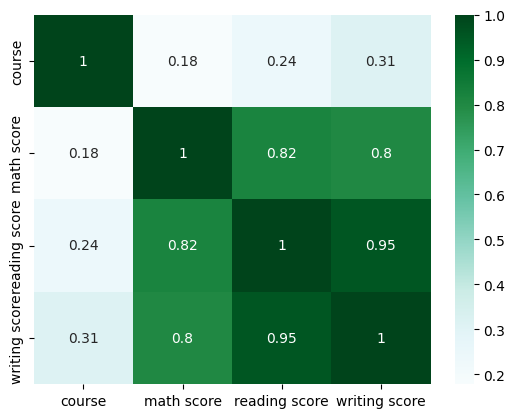

In [143]:
sns.heatmap(data = df1_corr, annot = True, cmap = 'BuGn')

In [144]:
df2=df[["gender"	,"math score",	"reading score"	,"writing score"]]

In [145]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [146]:
df2['gender'] = df2['gender'].apply(lambda x: 0 if x == 'female' else 1)

<ipython-input-146-27ca72d7eac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = df2['gender'].apply(lambda x: 0 if x == 'female' else 1)


In [147]:
df2.corr()

,gender,math score,reading score,writing score
gender,1.000000,0.167982,-0.244313,-0.301225
math score,0.167982,1.000000,0.817580,0.802642
reading score,-0.244313,0.817580,1.000000,0.954598
writing score,-0.301225,0.802642,0.954598,1.000000


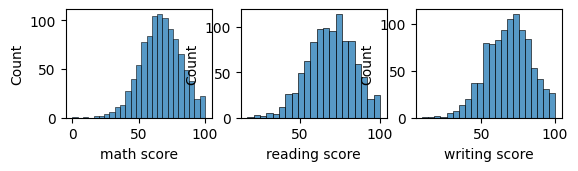

In [148]:
for i, col in enumerate(['math score', 'reading score','writing score']):
   plt.subplot(3, 3, i + 1)
   sns.histplot(data = df2,
                 x = col,
                 )
plt.show()

<Axes: xlabel='lunch', ylabel='math score'>

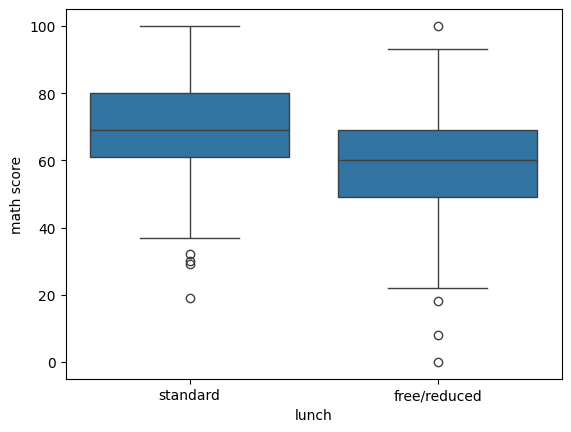

In [182]:
sns.boxplot(x="lunch",y="math score",data=df)

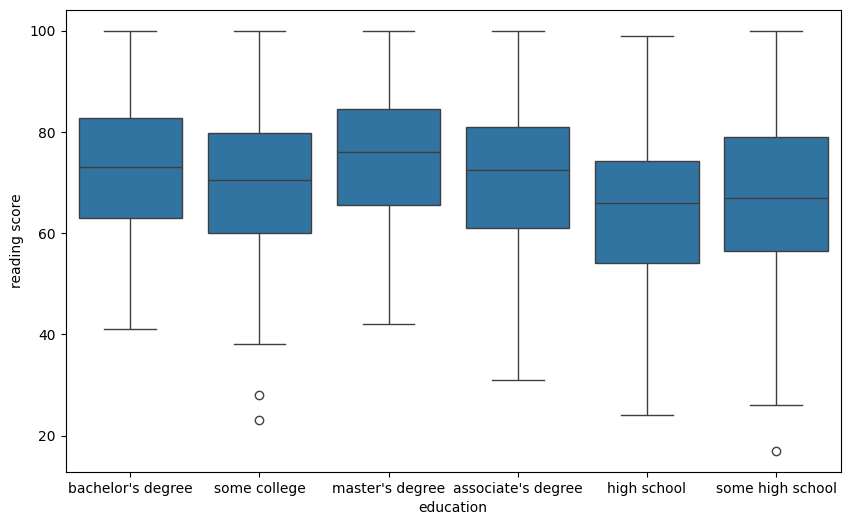

In [181]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="education",y="reading score",data=df)
plt.show()

<Axes: xlabel='course', ylabel='writing score'>

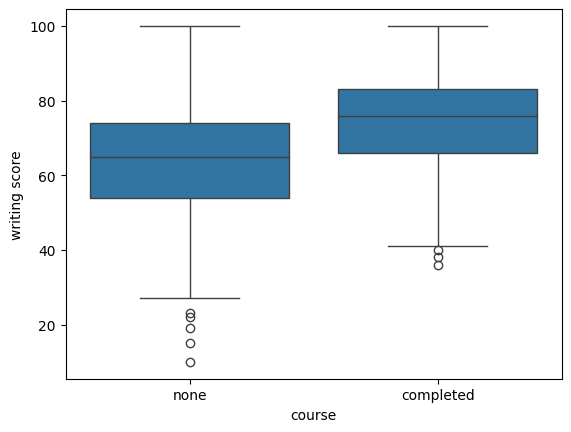

In [154]:
sns.boxplot(x="course",y="writing score",data=df)

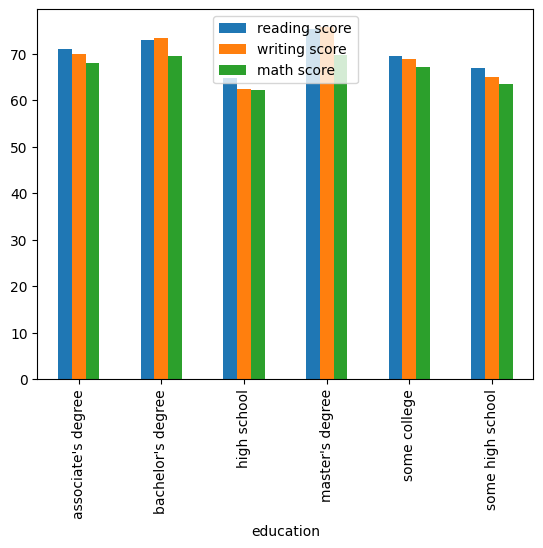

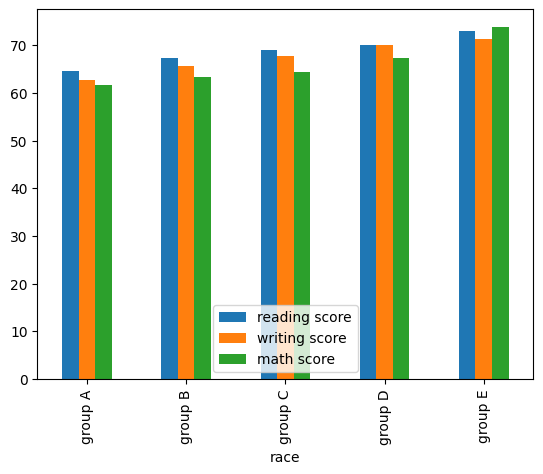

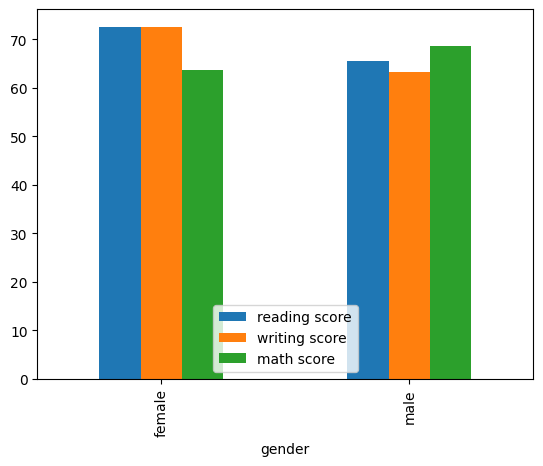

In [155]:
groupings = ["education", "race", "gender"]
for grouping in groupings:
    df.groupby(grouping)[["reading score", "writing score", "math score"]].mean().plot(kind="bar")

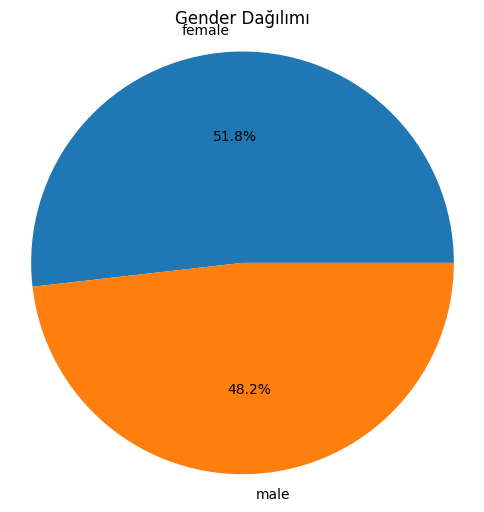

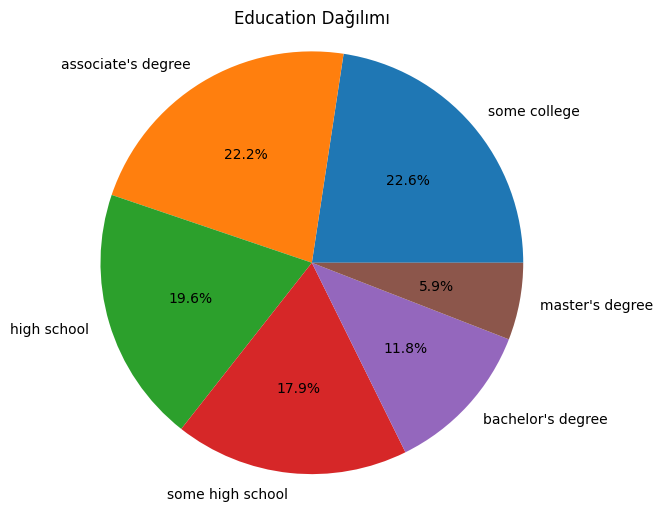

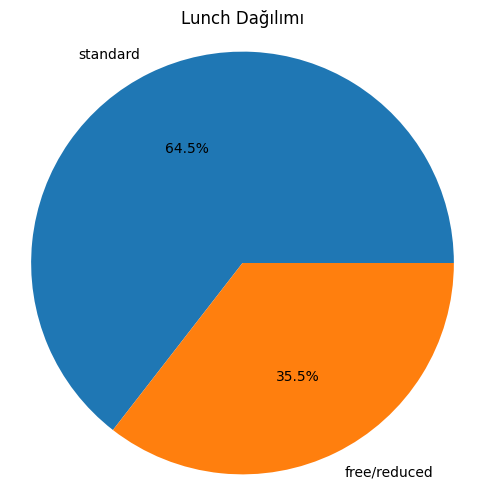

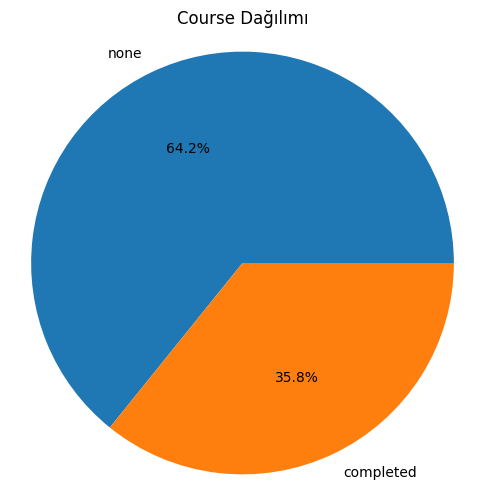

In [156]:
columns = ["gender", "education", "lunch", "course"]

for column in columns:

    counts = df[column].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f"{column.capitalize()} Dağılımı")
    plt.axis('equal')

    plt.show()


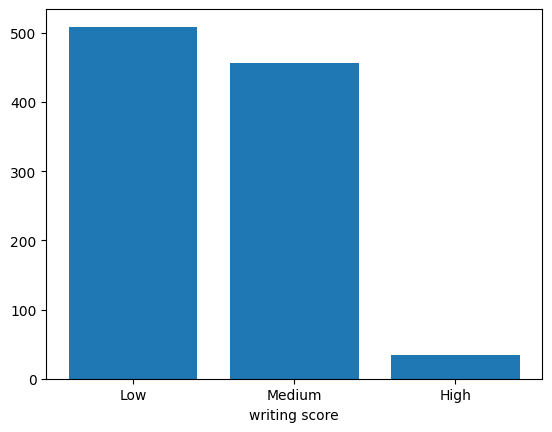

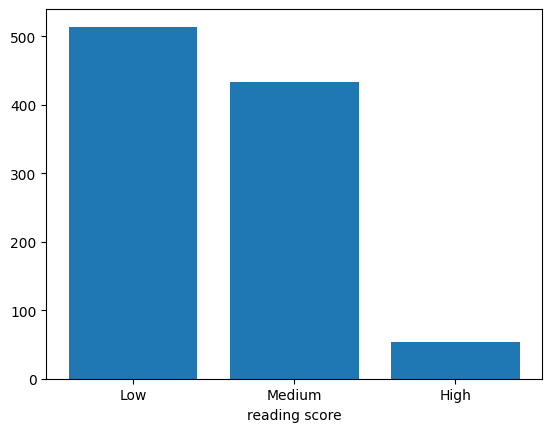

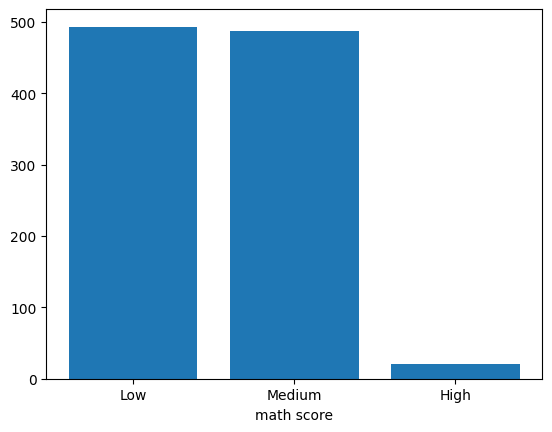

In [159]:
columns = ["writing score", "reading score", "math score"]
bins = {column: np.linspace(min(df[column]), max(df[column]), 4) for column in columns}
group_names = ['Low', 'Medium', 'High']


for column in columns:
    df[f'{column}-binned'] = pd.cut(df[column], bins=bins[column], labels=group_names, include_lowest=True)

    plt.bar(group_names, df[f'{column}-binned'].value_counts())

    plt.xlabel(column)
    plt.show()

In [167]:
group=df[["race","lunch","math score"]]
grouped_data=group.groupby(["race","lunch"],as_index=False).mean()
grouped_data

,race,lunch,math score
0,group A,free/reduced,55.222222
1,group A,standard,65.981132
2,group B,free/reduced,57.434783
3,group B,standard,66.884298
4,group C,free/reduced,56.412281
5,group C,standard,68.941463
6,group D,free/reduced,61.115789
7,group D,standard,70.916168
8,group E,free/reduced,66.560976
9,group E,standard,76.828283


<Axes: xlabel='race', ylabel='math score'>

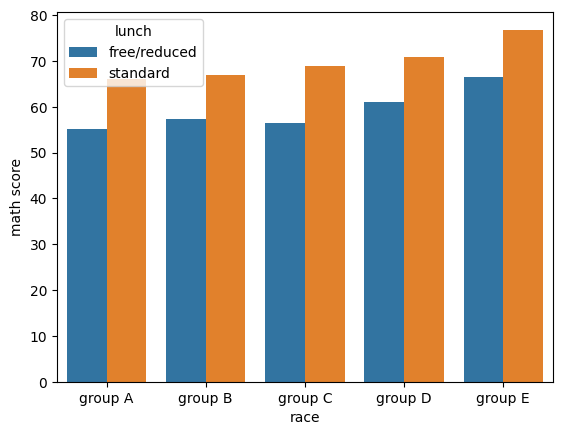

In [168]:
sns.barplot(x="race", y="math score", hue="lunch", data=grouped_data)